Chapter 19

# 一元函数极小值点
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码使用数值优化和符号微分来分析并绘制函数

$$
f(x) = -2x e^{-x^2}
$$

在给定区间内的最小值及其导数行为。

首先，通过数值方法最小化 $f(x)$，找到局部最小值点 $x_{\text{min}}$。优化结果表明，算法成功找到一个使得 $f(x)$ 最小的 $x$ 值。在该点处，$f(x)$ 的导数应该接近零，因为在局部最小值附近，函数的斜率会趋于零。

随后，代码在区间 $[-2, 2]$ 上绘制目标函数 $f(x)$，并在曲线上标记出最小值点 $x_{\text{min}}$，展示了函数曲线的整体形状和极小值的位置。

最后，代码计算了 $f(x)$ 的一阶导数

$$
f'(x) = -2 e^{-x^2} + 4x^2 e^{-x^2}
$$

并绘制导数曲线，以显示导数在不同 $x$ 值下的变化。在 $x_{\text{min}}$ 附近，$f'(x)$ 接近零，这验证了函数在该点的极小性质。导数曲线还提供了 $f(x)$ 的增减性信息，通过观察 $f'(x)$ 的符号，可以分析 $f(x)$ 在不同区间上的递增或递减行为。

## 导入包

In [1]:
import matplotlib.pyplot as plt
from scipy import optimize
import numpy as np
from sympy import lambdify, diff, exp
from sympy.abc import x  # 导入符号 x

## 定义函数

In [2]:
f_x = -2 * x * exp(-x**2)  # 定义目标函数 f(x) = -2x * exp(-x^2)
f_x

-2*x*exp(-x**2)

In [3]:
obj_f = lambdify(x, f_x)  # 将符号函数转换为数值函数

## 优化求解目标函数的最小值

In [4]:
result = optimize.minimize_scalar(obj_f)  # 使用数值方法最小化目标函数
print('=== Success ===')  # 打印求解是否成功
print(result.success)

=== Success ===
True


In [5]:
x_min = result.x  # 提取最小值点 x 的位置

x_array = np.linspace(-2, 2, 100)  # 定义 x 的取值范围
y_array = obj_f(x_array)  # 计算目标函数在 x_array 上的取值

## 绘制目标函数图像及最小值点

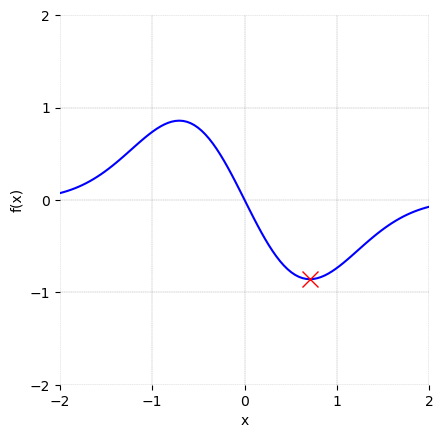

In [6]:
fig, ax = plt.subplots()
plt.plot(x_array, y_array, color='b')  # 绘制目标函数曲线
plt.plot(x_min, obj_f(x_min), color='r', marker='x', markersize=12)  # 标记最小值点

plt.xlabel('x'); plt.ylabel('f(x)')
plt.xticks(np.linspace(-2, 2, 5)); plt.yticks(np.linspace(-2, 2, 5))
plt.axis('scaled'); ax.set_xlim(-2, 2); ax.set_ylim(-2, 2)
ax.spines['top'].set_visible(False); ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False); ax.spines['right'].set_visible(False)
ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])

## 绘制一阶导数图像

In [7]:
f_x_1_diff = diff(f_x, x)  # 计算 f(x) 的一阶导数
f_x_1_diff

4*x**2*exp(-x**2) - 2*exp(-x**2)

In [8]:
f_x_1_diff_fcn = lambdify(x, f_x_1_diff)  # 将导数转换为数值函数
f_x_1_diff_array = f_x_1_diff_fcn(x_array)  # 计算一阶导数在 x_array 上的值

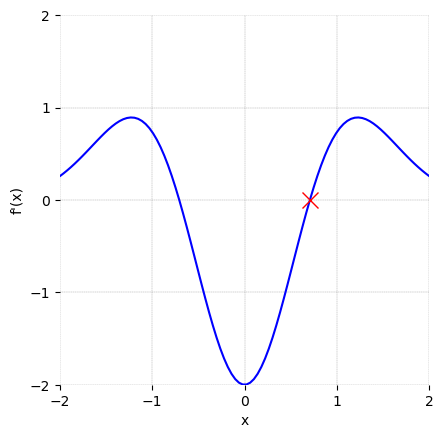

In [9]:
fig, ax = plt.subplots()
plt.plot(x_array, f_x_1_diff_array, color='b')  # 绘制一阶导数曲线
plt.plot(x_min, f_x_1_diff_fcn(x_min), color='r', marker='x', markersize=12)  # 标记一阶导数在最小值点的值

plt.xlabel('x'); plt.ylabel('f\'(x)')
plt.xticks(np.linspace(-2, 2, 5)); plt.yticks(np.linspace(-2, 2, 5))
plt.axis('scaled'); ax.set_xlim(-2, 2); ax.set_ylim(-2, 2)
ax.spines['top'].set_visible(False); ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False); ax.spines['right'].set_visible(False)
ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])